**Problem Statement** : *Distribute a set of robots positioned along a straight line into two equal halves. The positions of the two extreme robots on the line (leftmost and rightmost) are given, as well as the initial positions of the other robots in between. The objective is to divide the robots into two halves, such that one half is on one side of the line and the other half is on the opposite side.*

In [ ]:
import sys
import matplotlib.pyplot as plt

In [ ]:
class Robot:
    def __init__(self, id, position):
        """
        Initialize a Robot object.

        Parameters:
        id (int): Unique identifier for the robot.
        position (float or int): The position of the robot along the line (could be 1D, typically on a number line).
        """
        self.id = id  # Assign the robot's ID.
        self.position = position  # Assign the robot's position on the line.

    def __repr__(self):
        """
        Return a string representation of the Robot object.

        Returns:
        str: A string showing the robot's ID and its position.
        """
        return f"Robot {self.id}: Position {self.position}"

In [ ]:
# Input the total number of robots
num = int(input("Enter number of robots: "))
robots = []  # Initialize an empty list to store Robot objects

# Input the position of the leftmost robot and create its Robot object
posL = float(input(f"Enter position of leftmost robot: "))
robots.append(Robot(1, posL))  # Append the leftmost robot (ID=1) to the robots list

# Input the position of the rightmost robot and create its Robot object
posR = float(input(f"Enter position of rightmost robot: "))
robots.append(Robot(num, posR))  # Append the rightmost robot (ID=num) to the robots list

# Check if the number of robots is larger than the available space on the line
# If the total number of positions (posR - posL + 1) is less than the number of robots, exit the program
if posR - posL + 1 < num:
    print("Number of Robots cannot be larger than the line")
    sys.exit()

# Check if the positions of the leftmost and rightmost robots are valid
# The leftmost robot's position should be less than the rightmost one
if posL >= posR:
    print("Invalid positions")
    sys.exit()

# Input the positions of the remaining robots (from 2 to num-1) and create Robot objects
for i in range(2, num):
    pos = float(input(f"Enter position of robot {i}: "))

    # Validate the position of the robot: It must be between posL and posR
    if pos < posL or pos > posR:
        print("Invalid position")
        sys.exit()

    # Append the valid robot (with its ID and position) to the robots list
    robots.append(Robot(i, pos))

# Sort the robots based on their positions (using lambda to extract the position attribute)
robots_sorted = sorted(robots, key=lambda robot: robot.position)

# Output the sorted list of robots (by their position)
for robot in robots_sorted:
    print(robot)

Enter number of robots: 7
Enter position of leftmost robot: 1
Enter position of rightmost robot: 7
Enter position of robot 2: 2
Enter position of robot 3: 2.5
Enter position of robot 4: 3
Enter position of robot 5: 3.5
Enter position of robot 6: 4.5
Robot 1: Position 1.0
Robot 2: Position 2.0
Robot 3: Position 2.5
Robot 4: Position 3.0
Robot 5: Position 3.5
Robot 6: Position 4.5
Robot 7: Position 7.0


In [ ]:
# Function to plot robots' positions in each iteration
def plot_robots(robots_sorted, iteration):
    positions = [robot.position for robot in robots_sorted]
    ids = [robot.id for robot in robots_sorted]

    plt.figure(figsize=(8, 4))
    plt.scatter(positions, [1]*len(robots_sorted), color='blue', zorder=5)

    for i, txt in enumerate(ids):
        plt.annotate(txt, (positions[i], 1.01), fontsize=10, ha='center')

    plt.xlim(posL-1, posR+1)  # Extend the x-axis limits a bit to show all robots clearly
    plt.ylim(0.95, 1.05)  # Keep a small y-range since we're focusing on x positions
    plt.title(f'Robot Positions - Iteration {iteration}')
    plt.xlabel('Position')
    plt.yticks([])  # Hide the y-axis ticks as we don't need them
    plt.grid(True)
    plt.show()

In [ ]:
def avoid_collision(position, factor):
    """
    Recursively move robots to avoid collisions.

    Parameters:
    position (float): The position where a robot is attempting to move.
    factor (float): The step size and direction to move the robot.
                    Positive factor moves the robot to the right, negative factor moves it to the left.

    This function checks if the current 'position' is already occupied by another robot.
    If it is, the robot is moved further in the same direction (by 'factor'), and this process continues recursively
    until an unoccupied position is found.
    """
    # Iterate over all robots to check if any robot is at the given position
    for robot in robots_sorted:
        if robot.position == position:
            # If a robot is found at the current position, calculate the next position
            new_position = position + factor

            # Recursively call avoid_collision to check and move the next robot if needed
            avoid_collision(new_position, factor)

            # Once an unoccupied position is found, move the robot to the new position
            robot.position = new_position


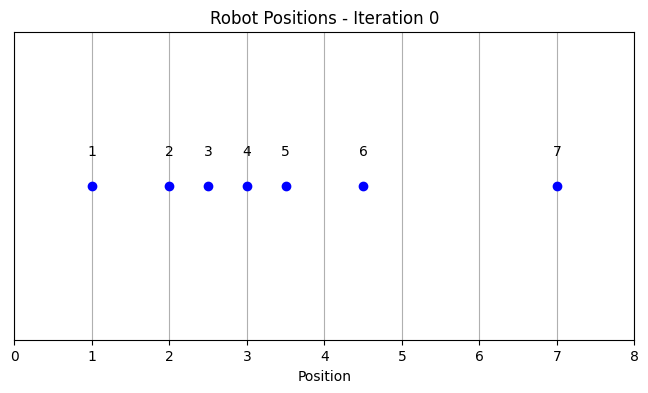

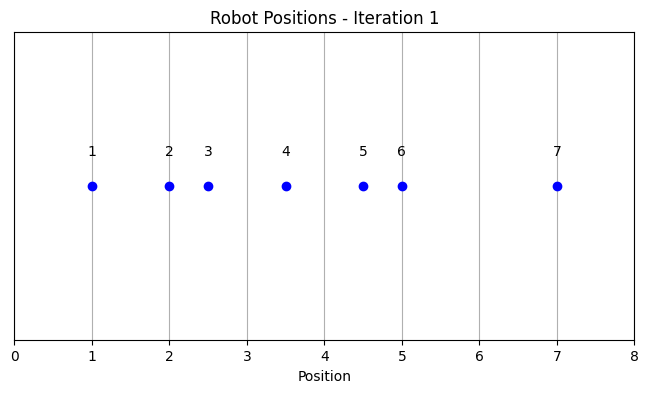

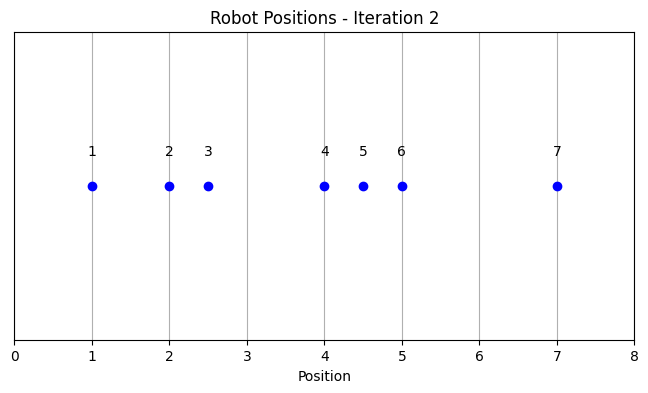

In [ ]:
# Calculate the initial median position based on the number of robots
if num % 2 == 0:
    # If the number of robots is even, the median is the average of the two middle robots
    median = (robots_sorted[num // 2].position + robots_sorted[num // 2 - 1].position) / 2
else:
    # If the number of robots is odd, the median is the position of the middle robot
    median = robots_sorted[num // 2].position

# Calculate the midpoint based on the positions of the leftmost and rightmost robots
mid = (robots_sorted[0].position + robots_sorted[num - 1].position) / 2

iteration = 0
plot_robots(robots_sorted, iteration)  # Plot initial positions

# Main loop to adjust the median toward the midpoint
while median != mid:
    iteration+=1  # Increment the iteration counter
    movement_flag = 0  # Flag to track if any robot has moved in this iteration

    if median < mid:
        # If the median is less than the midpoint, move the robots toward the right
        idx = num // 2  # Start from the middle robot
        while idx < len(robots_sorted) and robots_sorted[idx].position <= mid:
            # Calculate the new position by moving the robot 0.5 units to the right
            new_position = robots_sorted[idx].position + 0.5

            # Ensure there are no collisions at the new position
            avoid_collision(new_position, 0.5)

            # Move the current robot to the new position
            robots_sorted[idx].position = new_position

            # Set the movement flag to 1 as a robot has moved
            movement_flag = 1
            idx += 1  # Move to the next robot

    else:
        # If the median is greater than the midpoint, move the robots toward the left
        idx = num // 2  # Start from the middle robot
        while robots_sorted[idx].position >= mid:
            # Calculate the new position by moving the robot 0.5 units to the left
            new_position = robots_sorted[idx].position - 0.5

            # Ensure there are no collisions at the new position
            avoid_collision(new_position, -0.5)

            # Move the current robot to the new position
            robots_sorted[idx].position = new_position

            # Set the movement flag to 1 as a robot has moved
            movement_flag = 1
            idx -= 1  # Move to the previous robot

    # Plot positions in each iteration
    plot_robots(robots_sorted, iteration)

    # Break the loop if no robot has moved in the current iteration
    if movement_flag == 0:
        break

    # Recalculate the median after the robots have moved
    if num % 2 == 0:
        # If the number of robots is even, the median is the average of the two middle robots
        median = (robots_sorted[num // 2].position + robots_sorted[num // 2 - 1].position) / 2
    else:
        # If the number of robots is odd, the median is the position of the middle robot
        median = robots_sorted[num // 2].position
